In [1]:
import numpy as np
import numpy.linalg as la
%matplotlib notebook
import matplotlib.pyplot as plt
import tqdm

# Влияние обусловленности

### Пример 1.

Проверим, как обусловленность матрицы **A** влияет на вычисление произведения **Ab=c** при разных **b**.

Сначала посмотрим, как она обусловлена и какие у неё сингулярные числа.

Кстати, поскольку обратная матрица имеет такое же число обусловленности, приводимые ниже эффекты проявятся и при решении СЛАУ **Ax=b**.

In [2]:
A = np.array([
    [1, 1],
    [0, 1],
], dtype='float')
A_inv = np.linalg.pinv(A)
cond = np.linalg.cond(A)
cond_inv = np.linalg.cond(A_inv)

U, s, V = np.linalg.svd(A)
print(f'singular values: {s}')
print(f's[0]/s[1] = {s[0]/s[1]:.5f}')
print(f'cond A: {cond:.5f}')
print(f'cond A_inv: {cond_inv:.5f}')

singular values: [1.61803399 0.61803399]
s[0]/s[1] = 2.61803
cond A: 2.61803
cond A_inv: 2.61803


In [3]:
def plot1(xs, *args, **kwargs):
    plt.plot([x[0] for x in xs],
             [x[1] for x in xs],
             *args, **kwargs)
    
def plot2(x1s, x2s, *args, **kwargs):
    for x1, x2 in zip(x1s, x2s):
        plt.plot([x1[0], x2[0]],
                 [x1[1], x2[1]],
                 *args, **kwargs)

Теперь применим **A** к единичному кругу.

<IPython.core.display.Javascript object>


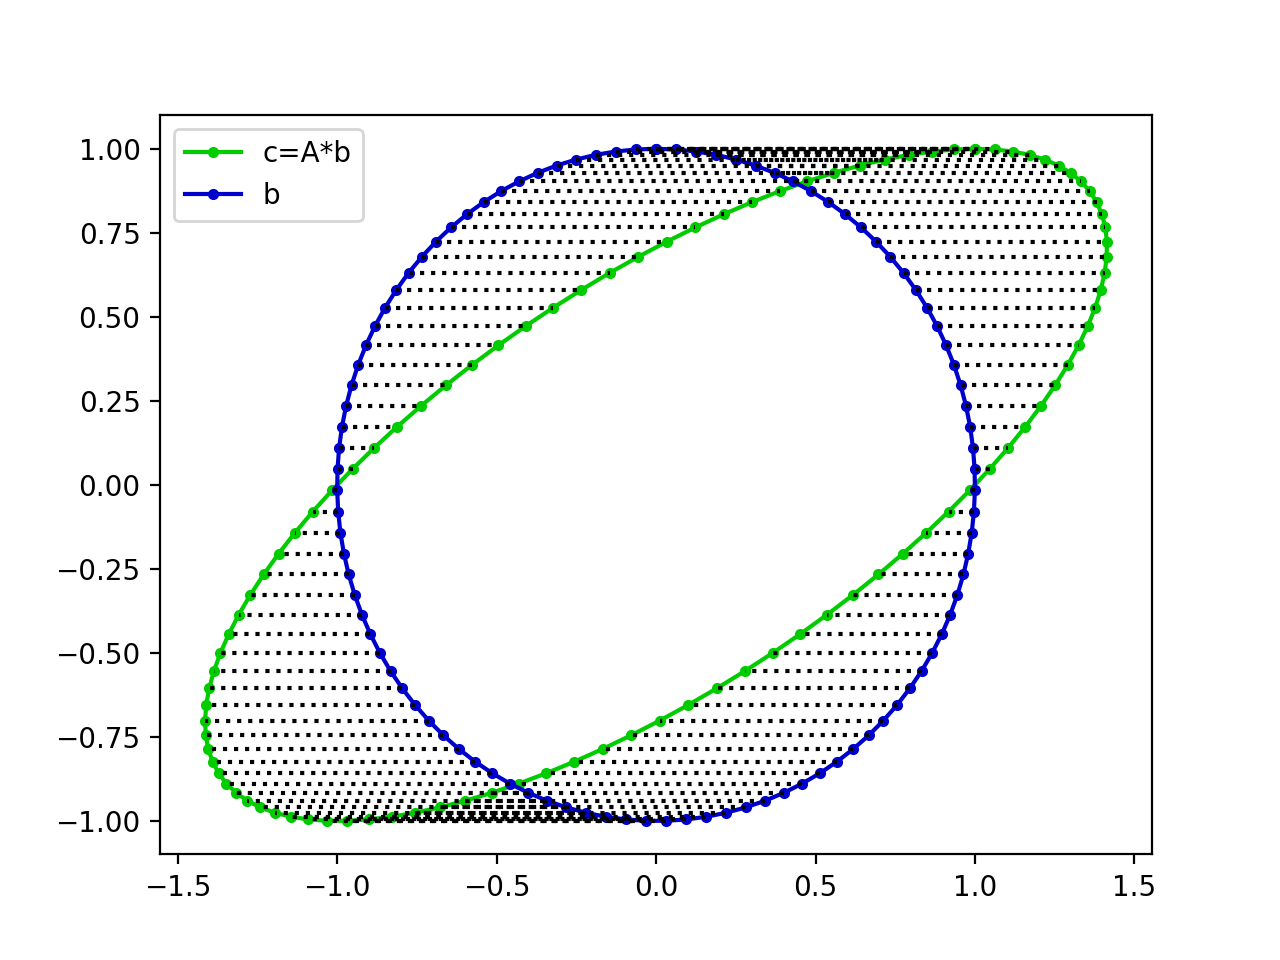

In [4]:
n = 100
ts = np.linspace(0, 2*np.pi, n)
bs = [np.array([np.sin(t), np.cos(t)]) for t in ts]
cs = [A @ [np.sin(t), np.cos(t)] for t in ts]

plt.figure()
plot1(cs, '.-', color='#00cc00', label='c=A*b')
plot1(bs, '.-', color='#0000cc', label='b')
plot2(bs, cs, 'k:')
plt.legend();

Посмотрим, куда переходят окрестности конкретных точек на круге.

<IPython.core.display.Javascript object>


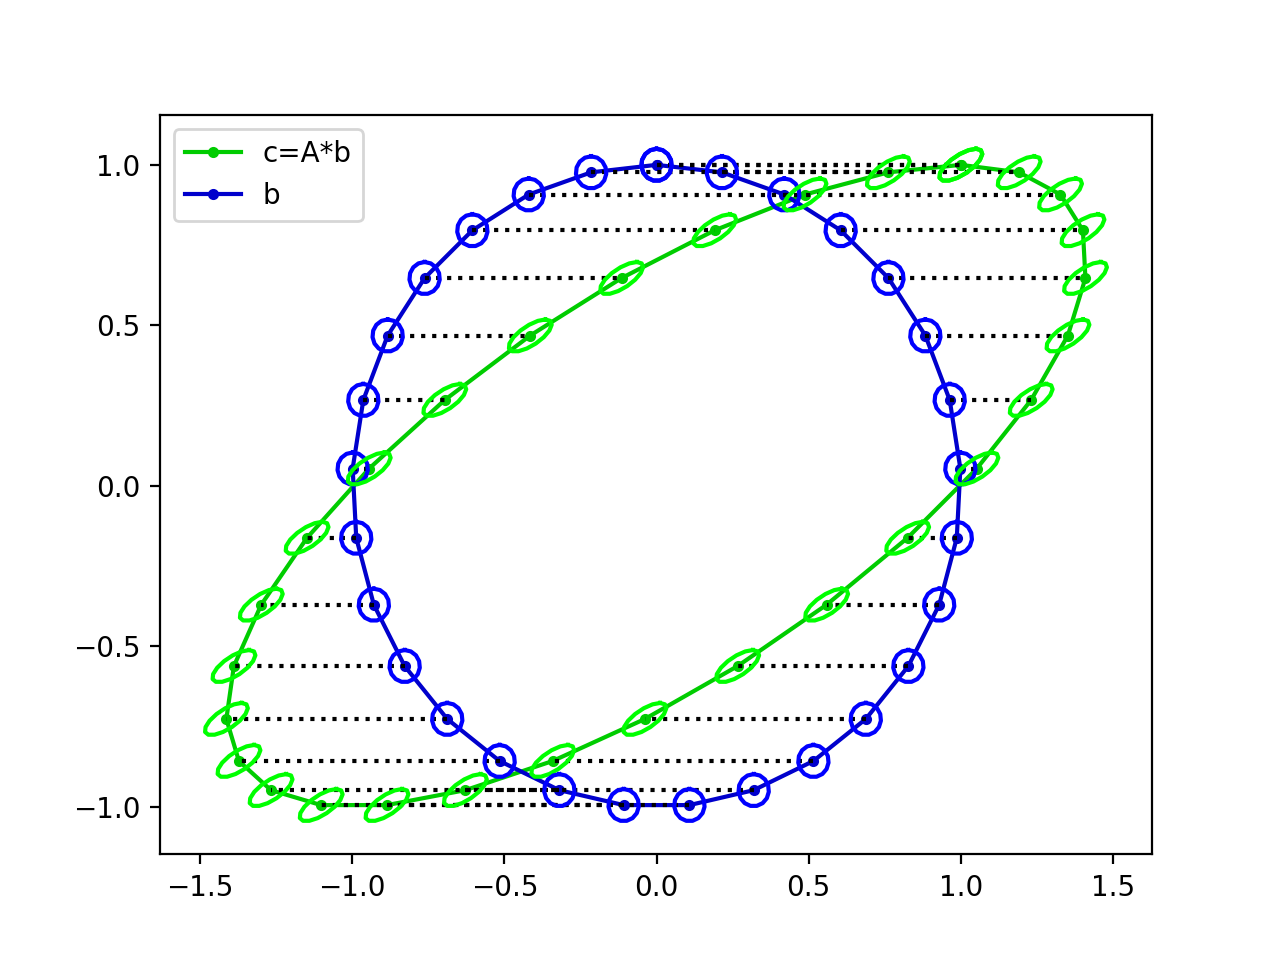

In [5]:
plt.figure()
n = 30
ts = np.linspace(0, 2*np.pi, n)
bs = [np.array([np.sin(t), np.cos(t)]) for t in ts]
cs = [A @ [np.sin(t), np.cos(t)] for t in ts]

plot1(cs, '.-', color='#00cc00', label='c=A*b')
plot1(bs, '.-', color='#0000cc', label='b')
plot2(bs, cs, 'k:')
plt.legend();

m = 16
eps = 5e-2
t1s = np.linspace(0, 2*np.pi, m)
dbs = [[eps*np.sin(t), eps*np.cos(t)] for t in t1s]
for i in range(n):
    b = bs[i]
    c = cs[i]
    b1s = [[b[0]+db[0], b[1]+db[1]] for db in dbs]
    c1s = [A @ b1 for b1 in b1s]
    
    plot1(b1s, '-', color='#0000ff')
    plot1(c1s, '-', color='#00ff00')

plt.legend();

Найдём точки, в которых относительное изменение **b** приводит к наибольшему относительному изменению **c**.

<IPython.core.display.Javascript object>


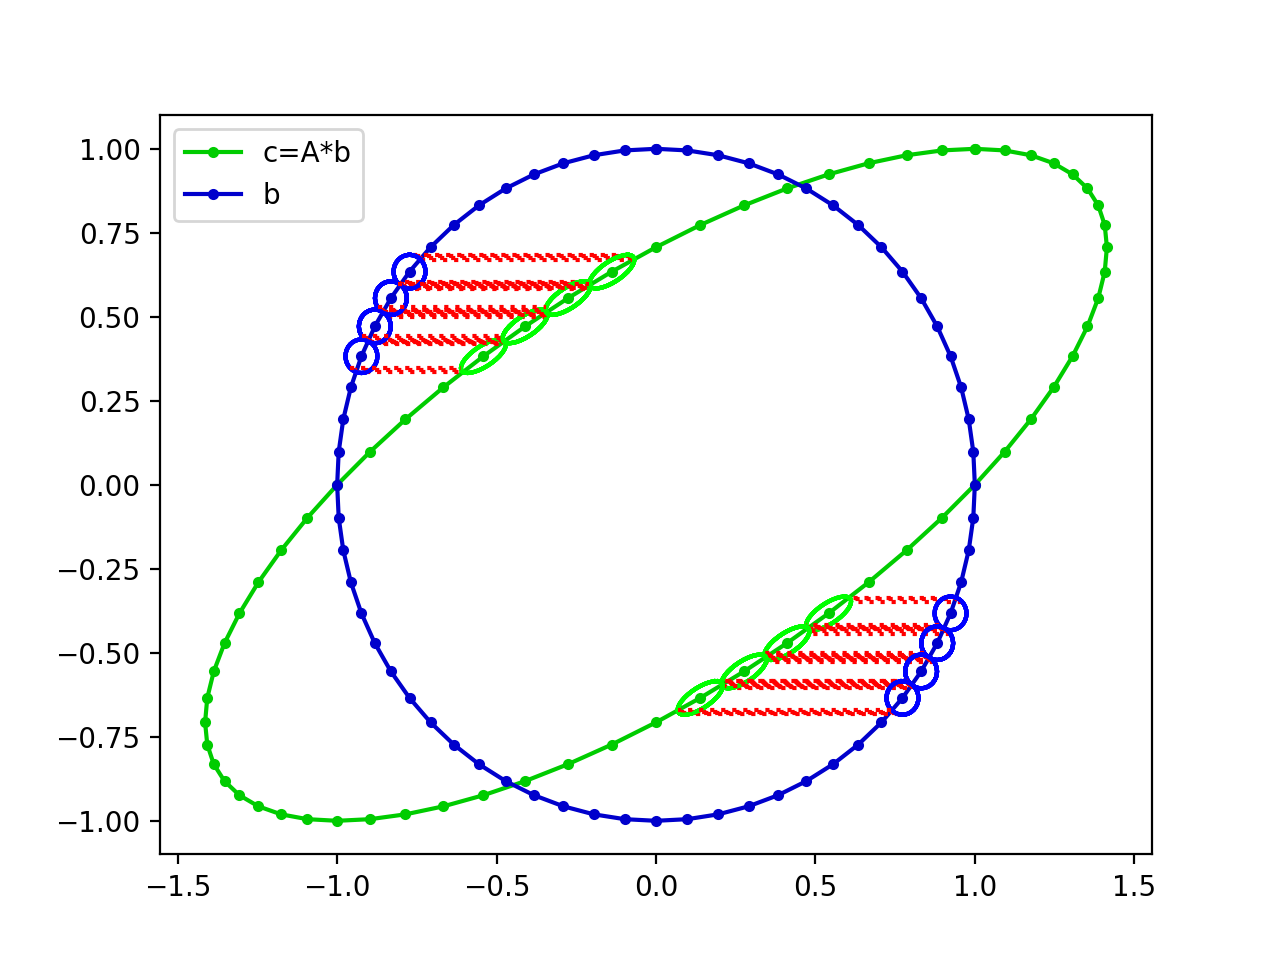

cond = 2.618, max (|dc|/|c|) / (|db|/|b|): 2.607


In [6]:
plt.figure()
n = 65
ts = np.linspace(0, 2*np.pi, n)
bs = [np.array([np.sin(t), np.cos(t)]) for t in ts]
cs = [A @ [np.sin(t), np.cos(t)] for t in ts]

plot1(cs, '.-', color='#00cc00', label='c=A*b')
plot1(bs, '.-', color='#0000cc', label='b')

m = 33
eps = 5e-2
t1s = np.linspace(0, 2*np.pi, m)
dbs = [[eps*np.sin(t), eps*np.cos(t)] for t in t1s]
rels = []
for i in range(n):
    b = bs[i]
    c = cs[i]
    b1s = [[b[0]+db[0], b[1]+db[1]] for db in dbs]
    c1s = [A @ b1 for b1 in b1s]
    
    for j in range(m):
        b1 = b1s[j]
        c1 = c1s[j]
        rel_b = np.linalg.norm(b1 - b) / np.linalg.norm(b)
        rel_c = np.linalg.norm(c1 - c) / np.linalg.norm(c)
        rel = rel_c / rel_b
        rels.append(rel)
        if 1.01 < rel > 0.90*cond:  # относительное изменение превышает 0.9 от числа обусловленности
            plot1(b1s, '-', color='#0000ff')
            plot1(c1s, '-', color='#00ff00')
            plt.plot([b1[0], c1[0]],
                     [b1[1], c1[1]],
                     ':', color='#ff0000')
plt.legend()

print(f'cond = {cond:.3f}, max (|dc|/|c|) / (|db|/|b|): {np.max(rels):.3f}')

**Вывод**: верхняя оценка этого отношения и есть число обусловленности.

### Пример 2. Плохо обусловленная матрица.

<IPython.core.display.Javascript object>


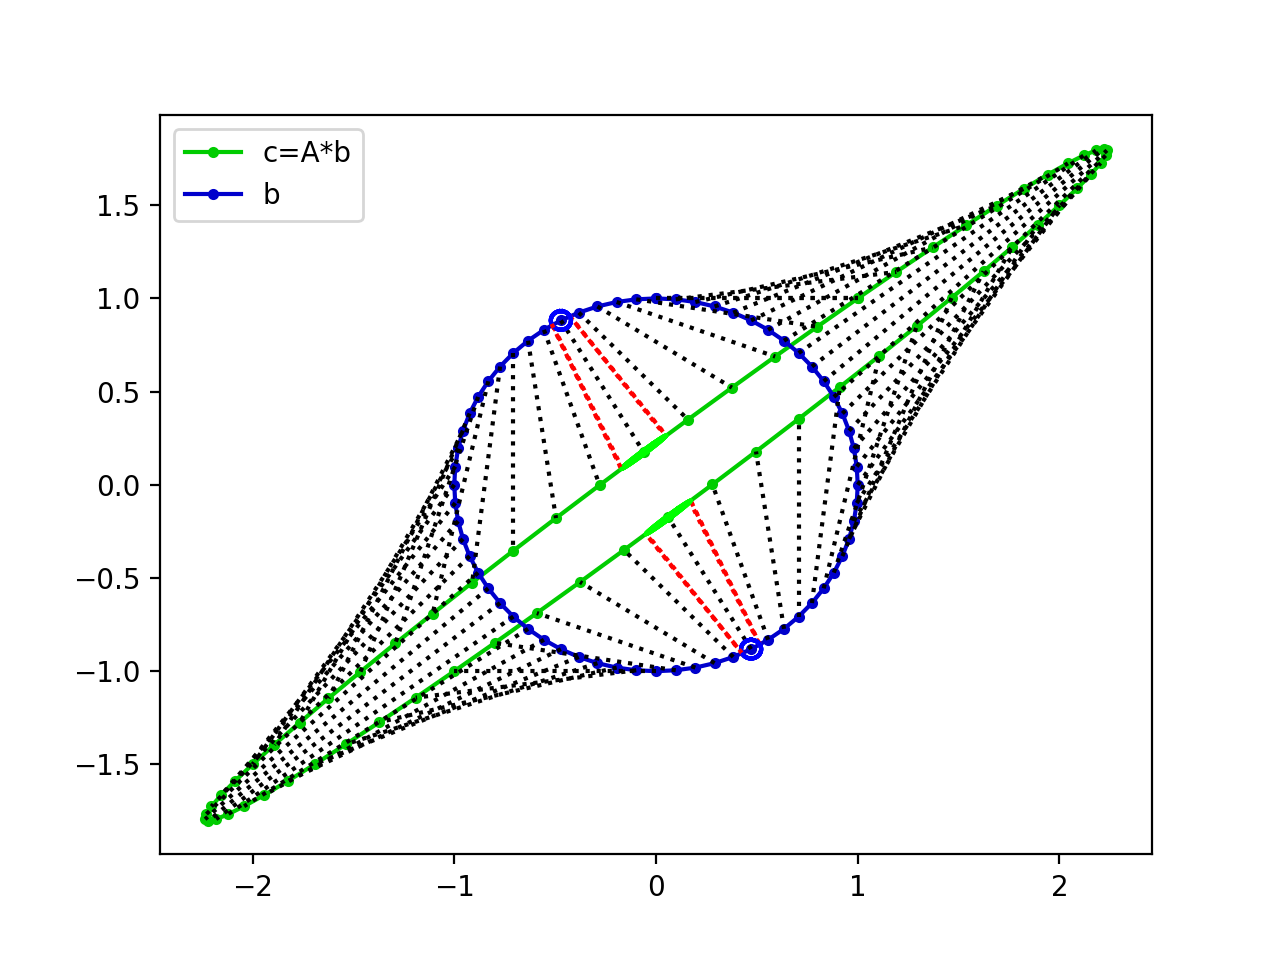

cond = 16.439, max (|dc|/|c|) / (|db|/|b|): 15.442


In [7]:
A = np.array([
    [2.0, 1],
    [1.5, 1],
], dtype='float')
A_inv = np.linalg.pinv(A)
cond = np.linalg.cond(A)

plt.figure()
n = 65
ts = np.linspace(0, 2*np.pi, n)
bs = [np.array([np.sin(t), np.cos(t)]) for t in ts]
cs = [A @ [np.sin(t), np.cos(t)] for t in ts]

plot1(cs, '.-', color='#00cc00', label='c=A*b')
plot1(bs, '.-', color='#0000cc', label='b')
plot2(bs, cs, 'k:')

m = 33
eps = 5e-2
t1s = np.linspace(0, 2*np.pi, m)
dbs = [[eps*np.sin(t), eps*np.cos(t)] for t in t1s]
rels = []
for i in range(n):
    b = bs[i]
    c = cs[i]
    b1s = [[b[0]+db[0], b[1]+db[1]] for db in dbs]
    c1s = [A @ b1 for b1 in b1s]
    
    for j in range(m):
        b1 = b1s[j]
        c1 = c1s[j]
        rel_b = np.linalg.norm(b1 - b) / np.linalg.norm(b)
        rel_c = np.linalg.norm(c1 - c) / np.linalg.norm(c)
        rel = rel_c / rel_b
        rels.append(rel)
        if 1.01 < rel > 0.90*cond:  # относительное изменение превышает 0.9 от числа обусловленности
            plot1(b1s, '-', color='#0000ff')
            plot1(c1s, '-', color='#00ff00')
            plt.plot([b1[0], c1[0]],
                     [b1[1], c1[1]],
                     ':', color='#ff0000')
plt.legend()

print(f'cond = {cond:.3f}, max (|dc|/|c|) / (|db|/|b|): {np.max(rels):.3f}')

**Вывод**: сильнее всего пострадают от неустранимой погрешности области, отображающиеся близко к оси максимального сжатия.

При этом максимальные векторы погрешности будут направлены вдоль оси максимального растяжения.

### Пример 3. Хорошо обусловленная матрица.

<IPython.core.display.Javascript object>


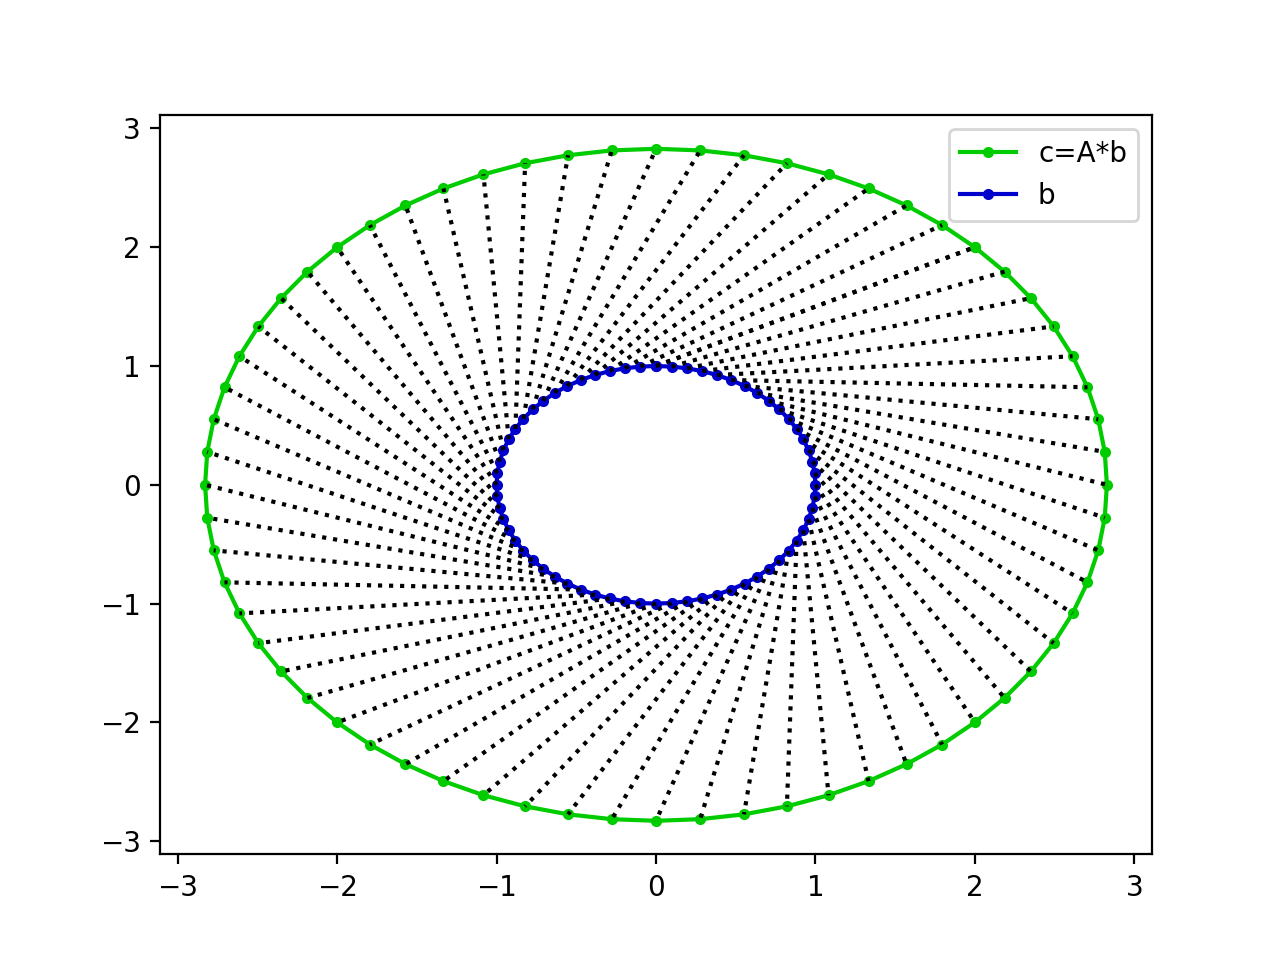

cond = 1.000, max (|dc|/|c|) / (|db|/|b|): 1.000


In [8]:
A = np.array([
    [2, 2],
    [-2, 2],
], dtype='float')
A_inv = np.linalg.pinv(A)
cond = np.linalg.cond(A)

plt.figure()
n = 65
ts = np.linspace(0, 2*np.pi, n)
bs = [np.array([np.sin(t), np.cos(t)]) for t in ts]
cs = [A @ [np.sin(t), np.cos(t)] for t in ts]

plot1(cs, '.-', color='#00cc00', label='c=A*b')
plot1(bs, '.-', color='#0000cc', label='b')
plot2(bs, cs, 'k:')

m = 33
eps = 5e-2
t1s = np.linspace(0, 2*np.pi, m)
dbs = [[eps*np.sin(t), eps*np.cos(t)] for t in t1s]
rels = []
for i in range(n):
    b = bs[i]
    c = cs[i]
    b1s = [[b[0]+db[0], b[1]+db[1]] for db in dbs]
    c1s = [A @ b1 for b1 in b1s]
    
    for j in range(m):
        b1 = b1s[j]
        c1 = c1s[j]
        rel_b = np.linalg.norm(b1 - b) / np.linalg.norm(b)
        rel_c = np.linalg.norm(c1 - c) / np.linalg.norm(c)
        rel = rel_c / rel_b
        rels.append(rel)  # относительное изменение превышает 1.01 (таких точек здесь быть не должно)
        if 1.01 < rel:
            plot1(b1s, '-', color='#0000ff')
            plot1(c1s, '-', color='#00ff00')
            plt.plot([b1[0], c1[0]],
                     [b1[1], c1[1]],
                     ':', color='#ff0000')
plt.legend()

print(f'cond = {cond:.3f}, max (|dc|/|c|) / (|db|/|b|): {np.max(rels):.3f}')

**Вывод**: когда все сингулярные числа равны (одинаковое растяжение по всем осям), никаких проблем с обусловленностью.